# Color Scale Bubbles

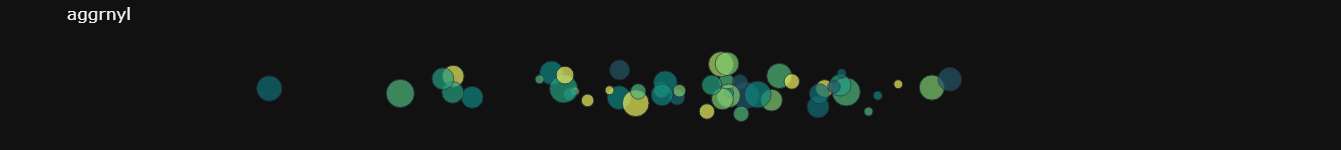

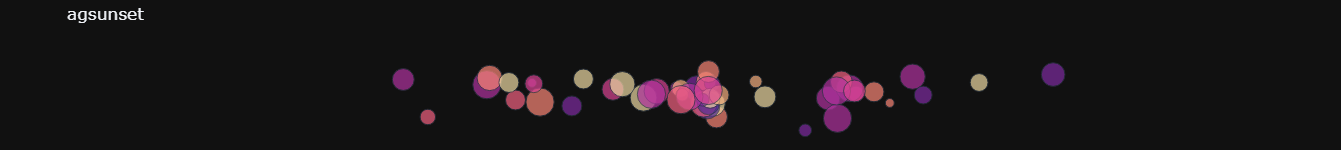

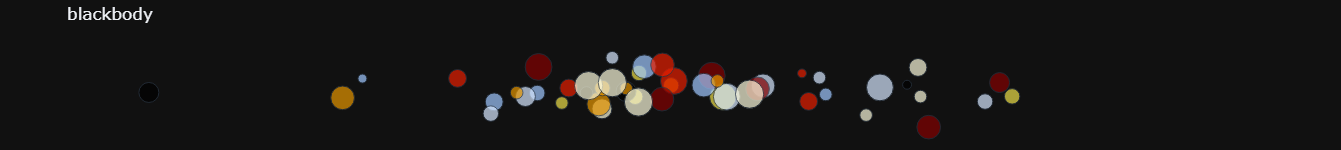

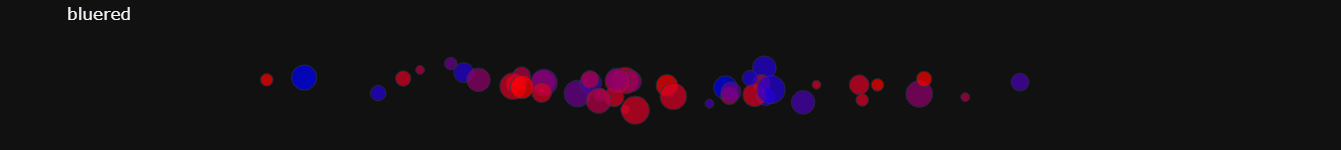

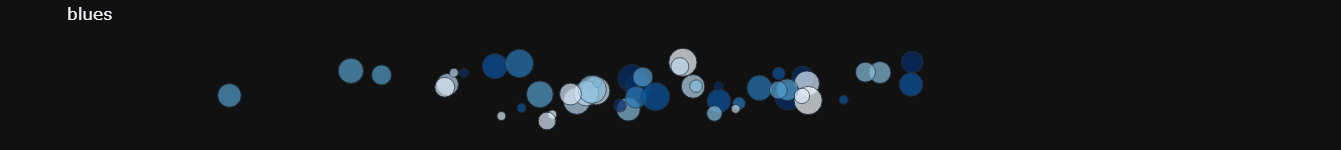

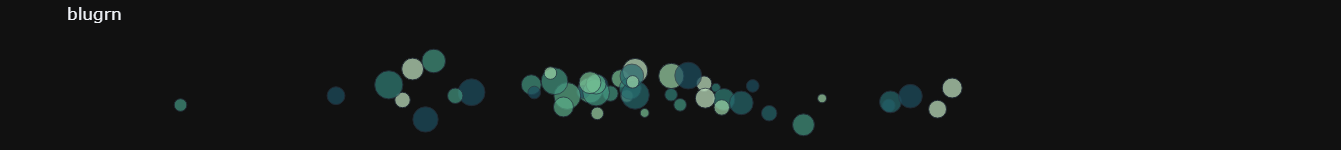

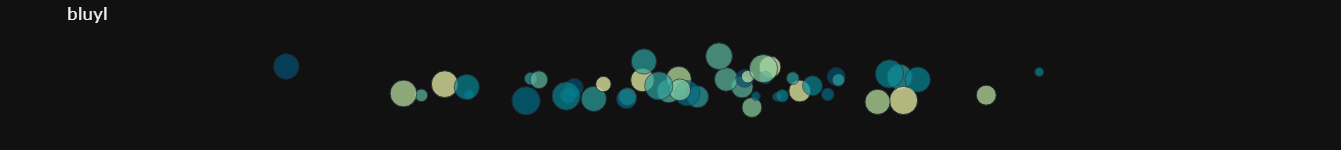

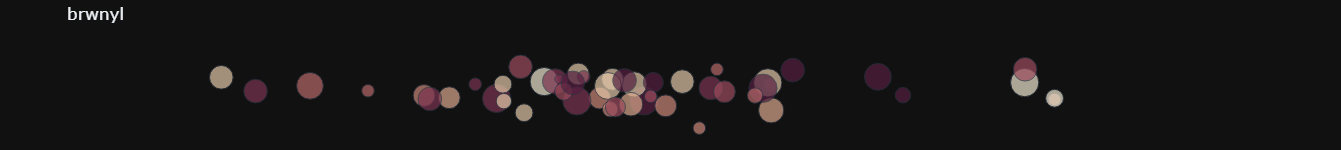

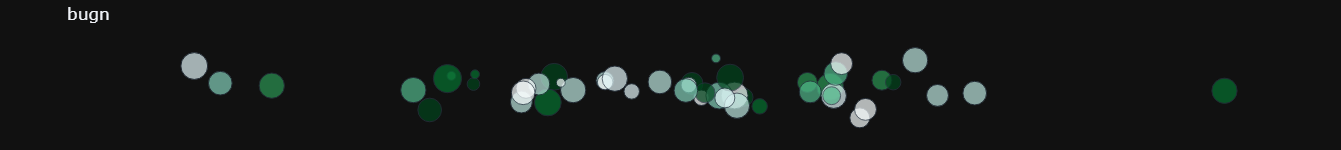

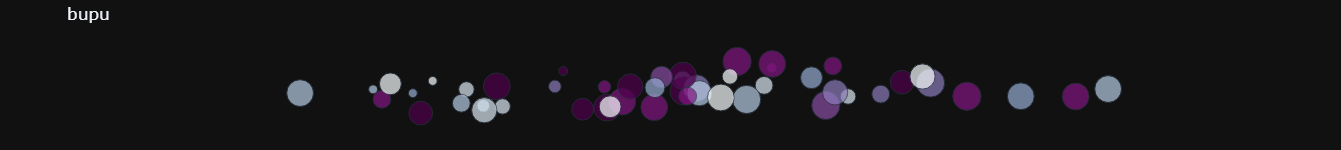

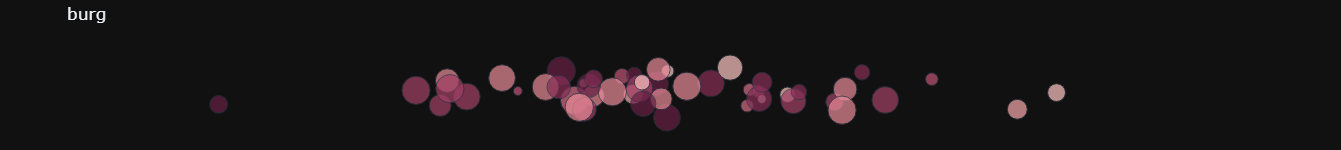

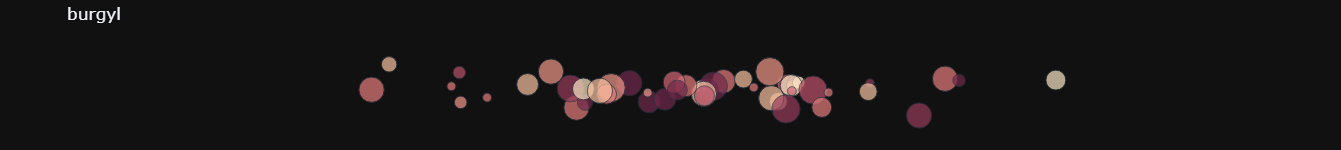

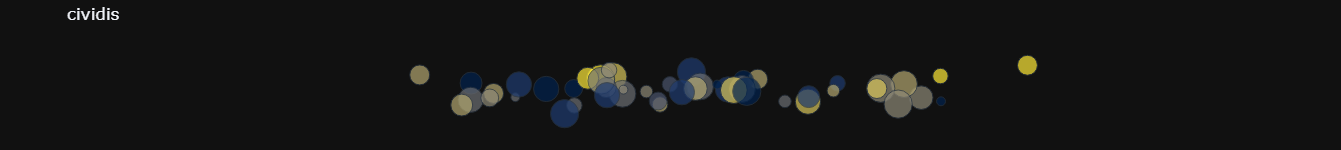

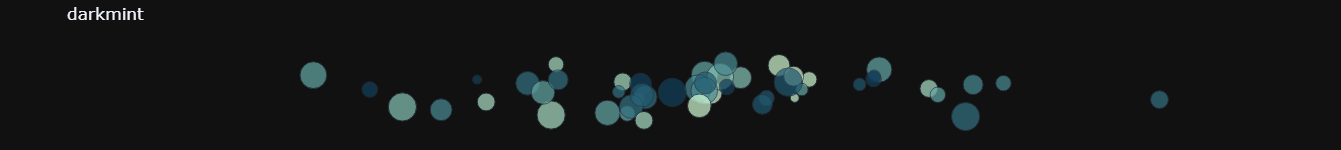

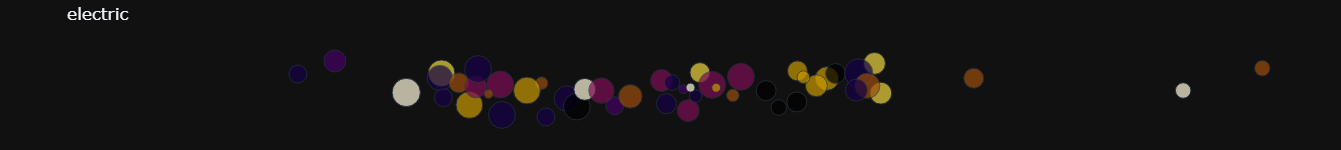

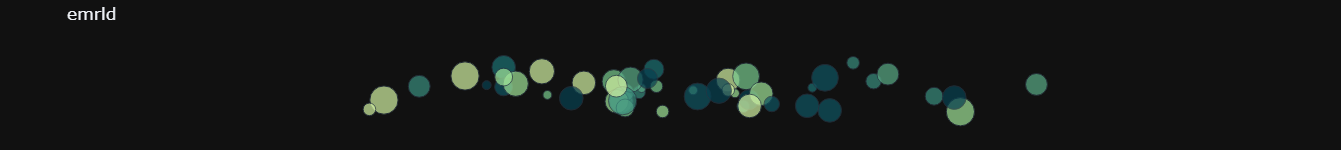

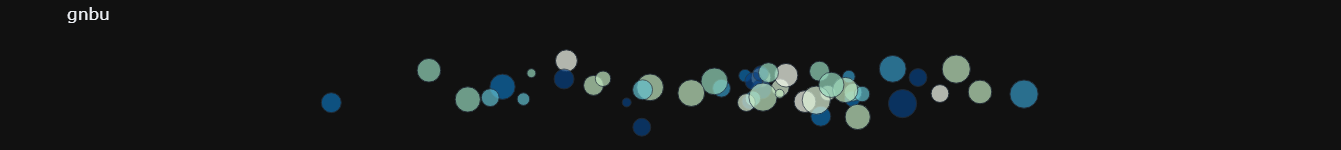

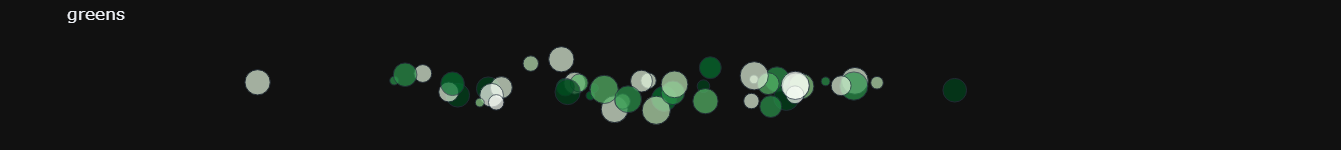

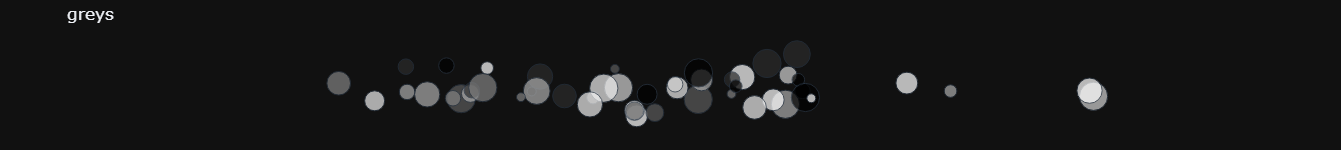

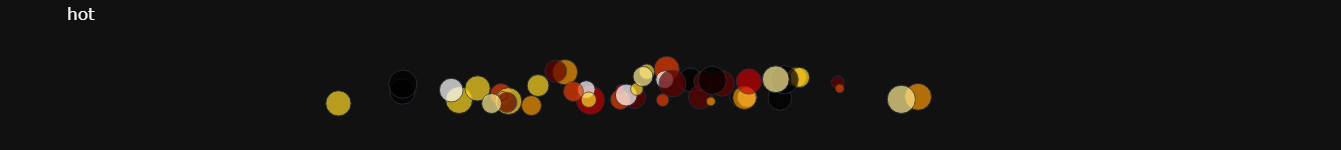

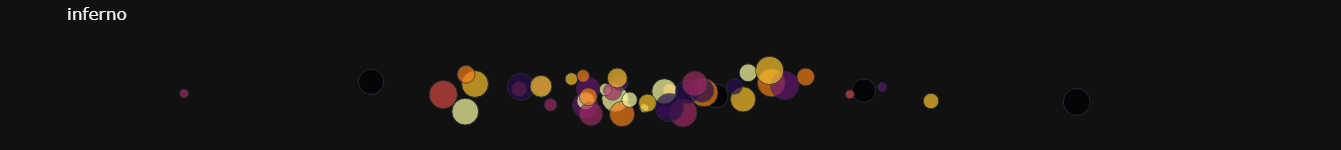

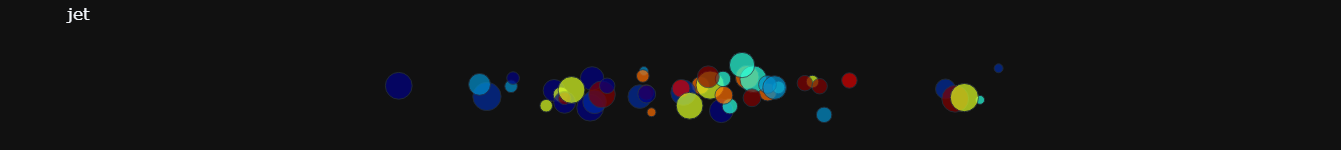

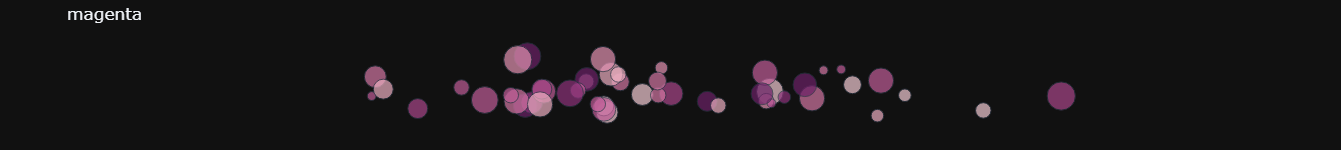

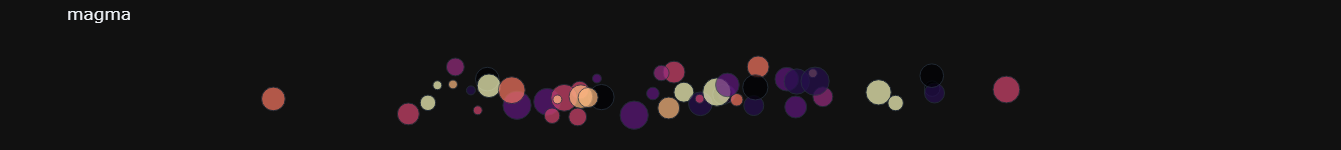

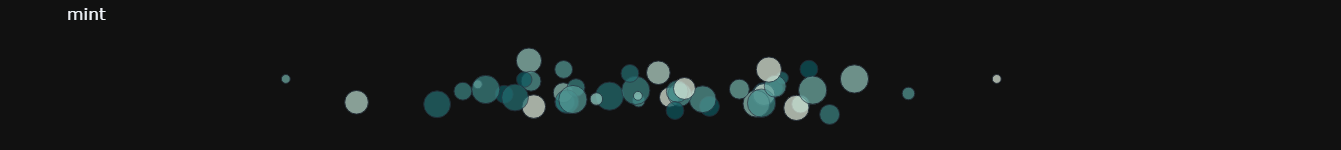

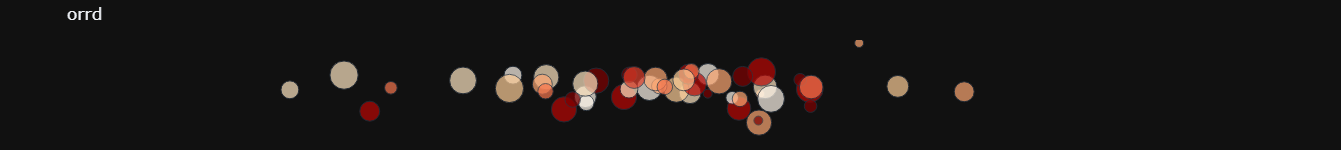

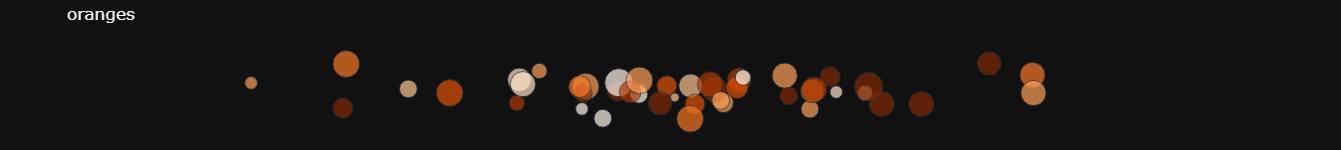

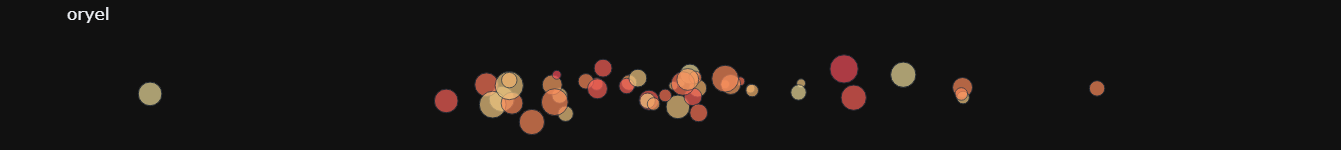

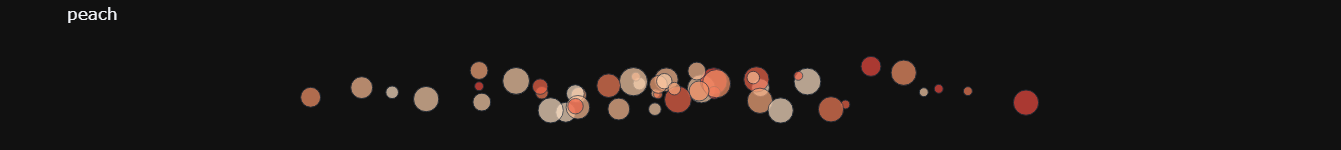

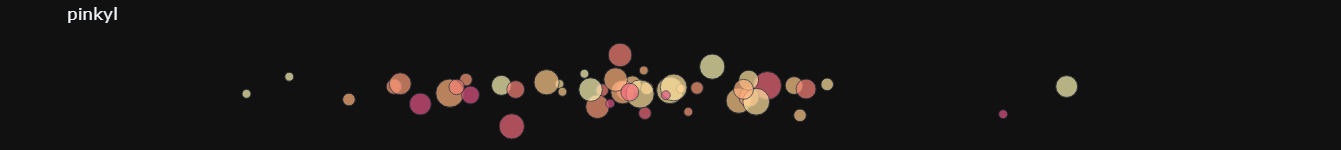

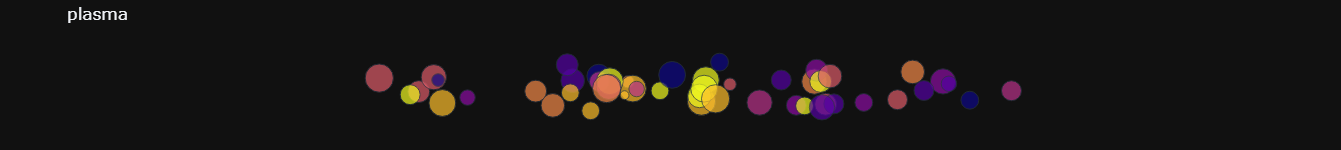

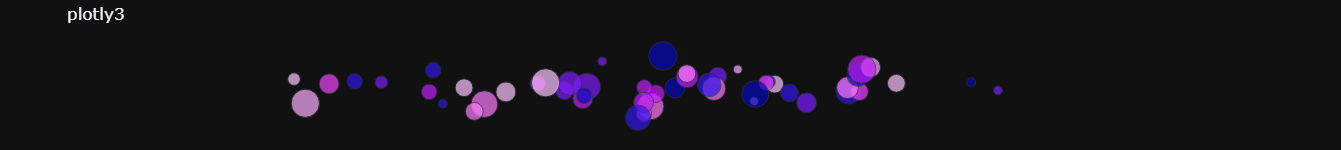

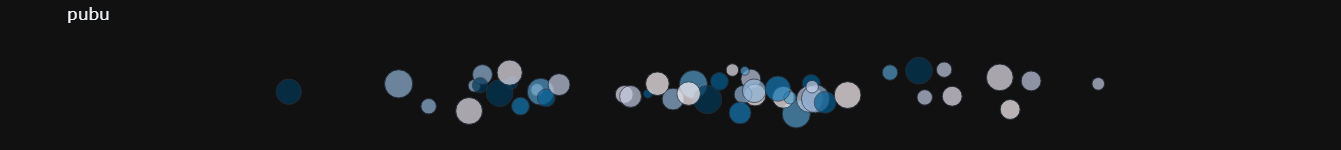

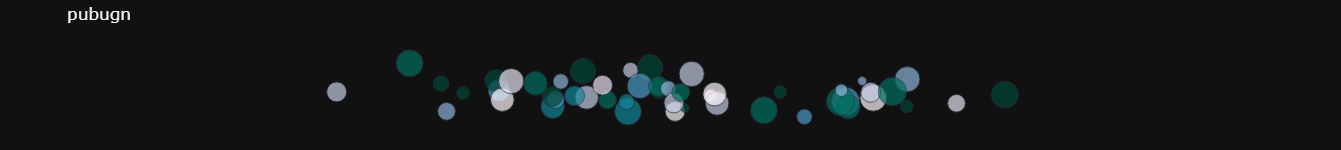

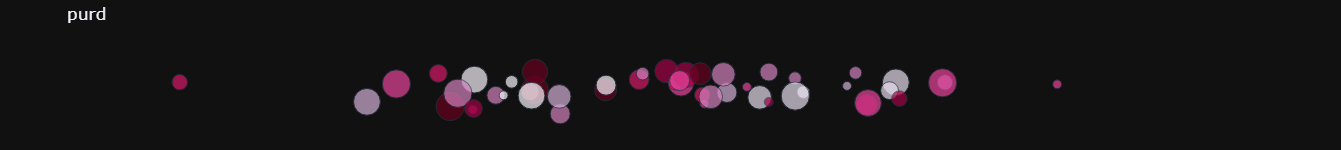

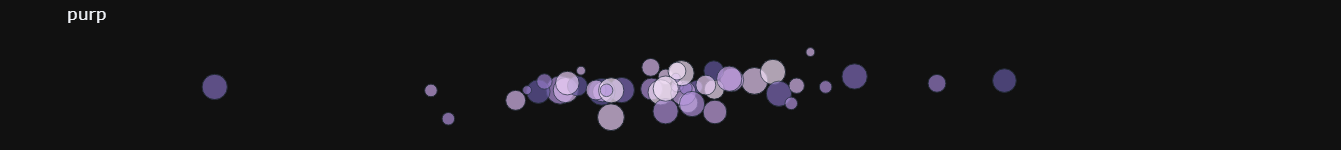

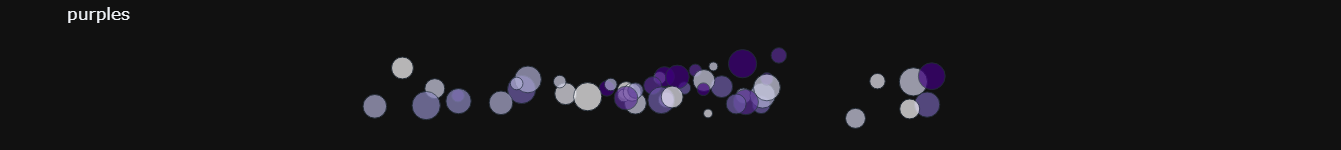

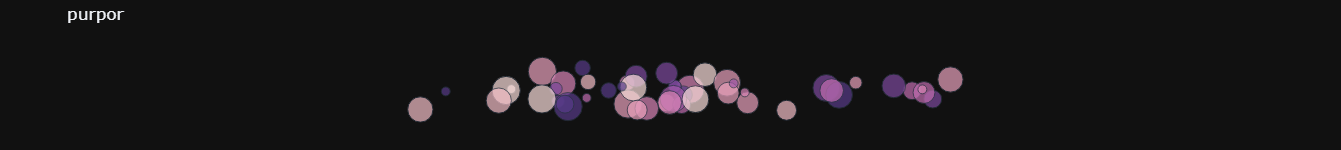

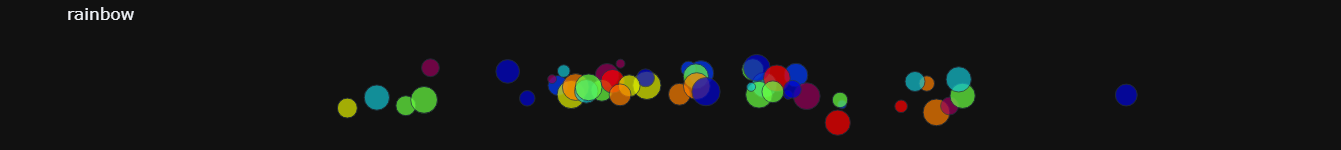

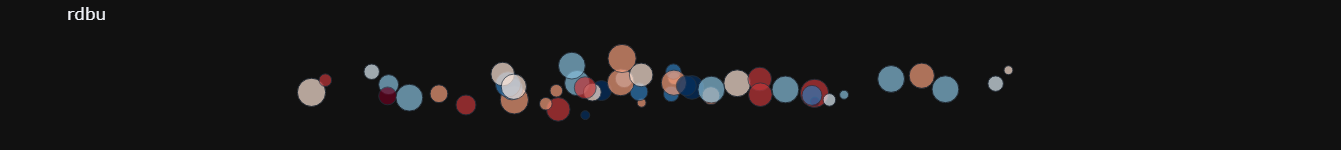

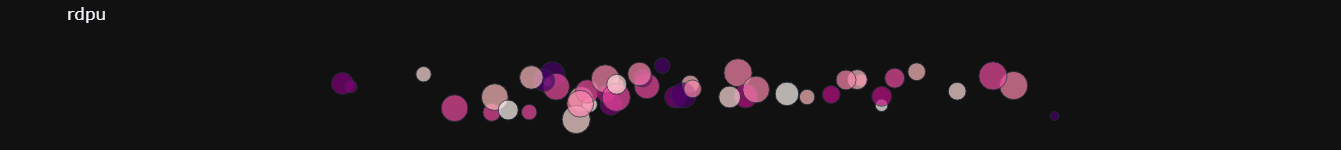

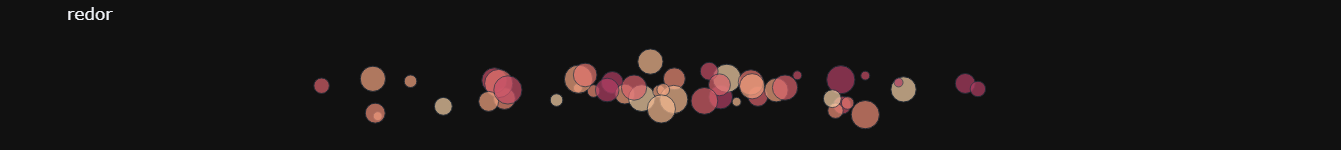

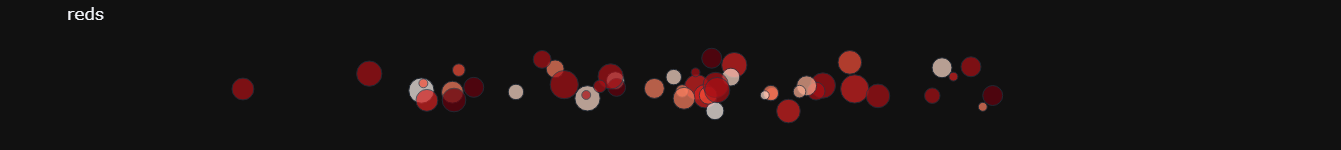

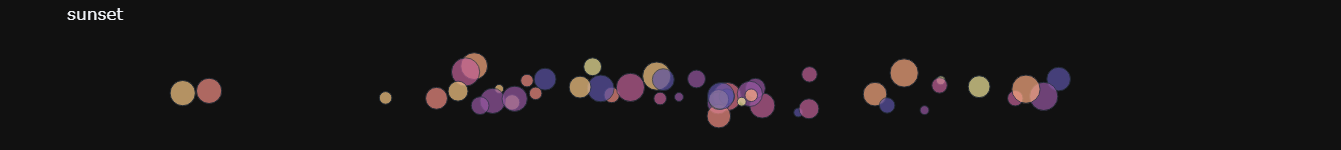

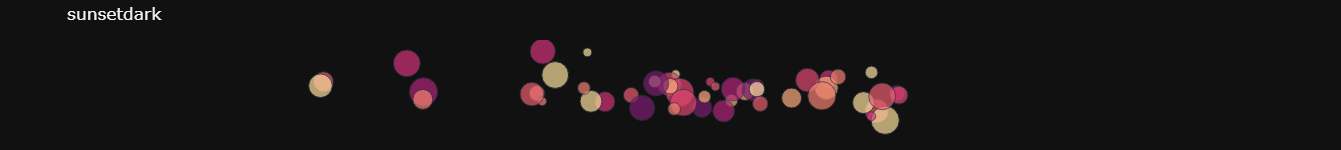

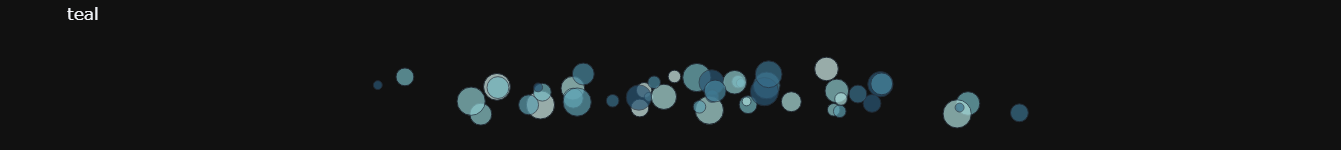

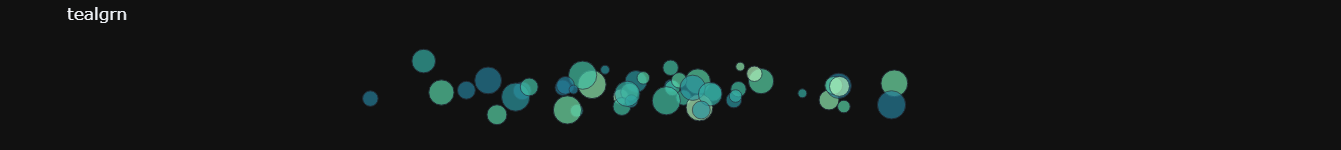

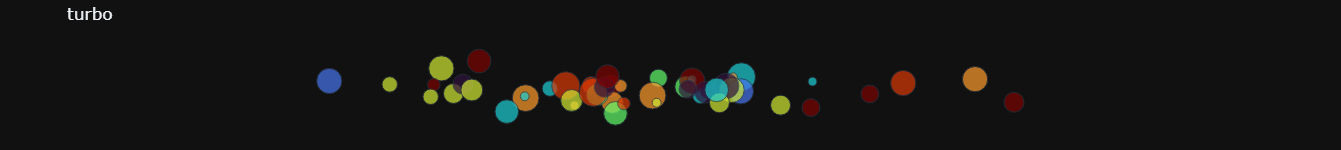

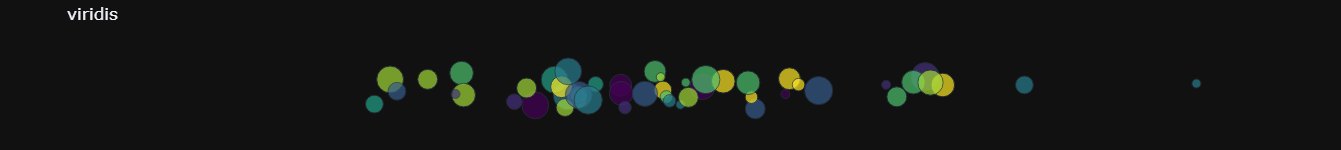

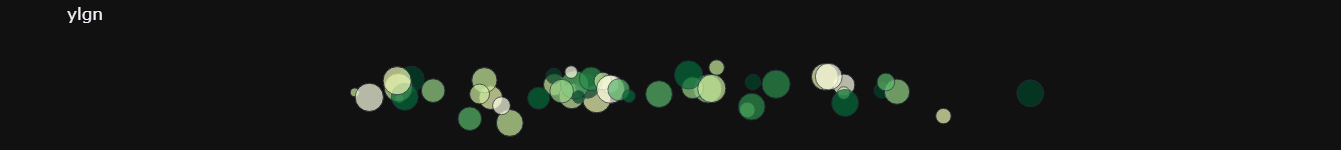

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

rng = np.random.default_rng()
figures = []
num_figures = 80

for i, color_scale in enumerate(px.colors.named_colorscales()[:num_figures]):

    num_bubbles = 50 # bubbles
    
    xy = np.random.normal(0, 3,   (num_bubbles, 2))    # (x, y): STD 3 around origin
    sizes = rng.integers(10, size=(num_bubbles, 1))+1  #  bubble size:  random 1 to 10
    colors = rng.integers(8, size=(num_bubbles, 1))+1  #  bubble color:  random 1 to 8
    
    df = pd.DataFrame(np.hstack([xy, sizes, colors]))
    df_labels = ['Distance', 'Height', 'Size', 'Color']
    df.columns = df_labels
    df[df_labels[0]] = df[df_labels[0]].round(3)      # Round X to 3 digits
    df[df_labels[1]] = df[df_labels[1]].round(3)      # Round Y to 3 digits
    df[df_labels[2]] = df[df_labels[2]].astype('int') # Bubble Sizes as Integers
    df[df_labels[3]] = df[df_labels[3]].astype('int') # Colors as Integers
    
    figures.append(px.scatter(df, title=color_scale,
                              x=df[df_labels[0]], y=df[df_labels[1]], 
                              size=df[df_labels[2]], color=df[df_labels[3]],  
                              color_continuous_scale = color_scale))
    figures[i].update_layout( xaxis_range=[-12,12], yaxis_range=[-12,12], # +/- 4 STDs
                              width=1200, height=150, 
                              template = 'plotly_dark', 
                              showlegend=False,
                              xaxis_visible=False, yaxis_visible=False, 
                              margin=dict(l=10,r=10,t=40,b=10))
    figures[i].update_coloraxes(showscale=False)
    figures[i].show()